In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
plt.style.use('ggplot')
# 排除警告信息
import warnings
# matplotlib画图常见参数设置
mpl.rcParams["font.family"] = "SimHei" 
# 设置字体
mpl.rcParams["axes.unicode_minus"]=False 
# 用来正常显示负号
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示中文标签# 嵌入式显示图形
%matplotlib inline
warnings.filterwarnings("ignore")

class Mycount(object):
    
    def __init__(self,df):
        self.onames=df.select_dtypes(include=['O']).columns.tolist()
        self.onum=len(self.onames)
        self.nnames=df.select_dtypes(include=['number']).columns.tolist()
        self.nnum=len(self.nnames)
        print('object 类型数据{}列，数字类型数据{}列'.format(self.onum,self.nnum))

    
    def odescribe(self,df):
        __deslis__=['最高','最低']
        count_name=[]
        count_rate=[]
        for i in self.onames:
            lis_ma=df[i].value_counts().idxmax()
            rate_ma=df[i].value_counts(normalize=True).max()
            lis_mi=df[i].value_counts().idxmin()
            rate_mi=df[i].value_counts(normalize=True).min()
            count_name+=[lis_ma,lis_mi]
            count_rate+=[rate_ma,rate_mi]
        __countIndex__=pd.MultiIndex.from_product([self.onames,__deslis__],names=('类别', '统计项'))
        re=pd.DataFrame({'名称':count_name,'比例':count_rate},index=__countIndex__)
        return re
    
    def plt_cov(self,df):
        plt.figure(figsize=(6,6))
        plt.title('MY COV',y=1.0,size=16)
        sns.heatmap(df[self.nnames].cov(),square=True,linewidths=0.1,linecolor='white',annot=True)
        plt.show()
        
    def plt_corr(self,df):
        plt.figure(figsize=(6,6))
        plt.title('MY CORR',y=1.0,size=16)
        sns.heatmap(df[self.nnames].corr(),square=True,linewidths=0.1,linecolor='white',annot=True)
        plt.show()  
    
    def plt_violin_box(self,df):
        __plt_data__=df.select_dtypes(include=['number'])
        plt.figure(figsize = [10, 5])
        # left plot: violin plot
        plt.subplot(1, 2, 1)
        ax1 = sns.violinplot(data=__plt_data__)
        ax1.set_title('数据小提琴图',y=1.05,size=16)
        # right plot: box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(data=__plt_data__)
        plt.title('数据箱图',y=1.05,size=16)
        plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
        plt.show()
    
    def plt_crossbar(self,df,bywho):
        __data_list__=[x for x in self.onames if x!=bywho]
        for i in __data_list__:
            pd.crosstab(index=df[i],columns=df[bywho]).plot(kind='bar')
            plt.xticks(rotation=0)
            plt.show()
    
    def plt_obar(self,df):
        for i in self.onames:
            x=df[i].value_counts().index
            __n__=x.shape[0]
            y=df[i].value_counts()
            plt.figure(figsize=(__n__,4))
            ax = sns.barplot(x=x,y=y,palette="Blues_d")
            plt.show()
            
    def plt_opie(self,df):
        for i in self.onames:
            plt.figure(figsize=(5, 5))  # 将画布设定为正方形，则绘制的饼图是正圆
            a=df[i].value_counts()
            b=a.index.tolist()
            plt.axes(aspect='equal')
            plt.pie(a,labels=b,autopct='%1.2f%%',pctdistance=0.6,labeldistance=1.1)
            plt.title(i+'分布')  # title的使用
            plt.show()  # 可视化呈现

In [5]:
path=r'E:\Machine Learning\pandas\joyful-pandas-master\data\Employee2.csv'
df1=pd.read_csv(path)

In [6]:
df1.sample(5)

,Company,Name,Age,Height,Weight,Salary
25,D,d4,38,167,80.5,27224
11,B,b7,47,189,51.1,17396
2,A,a3,34,168,96.6,16503
18,C,c3,52,180,73.4,29963
33,E,e8,45,171,90.0,15832


In [8]:
plt.style.use('ggplot')

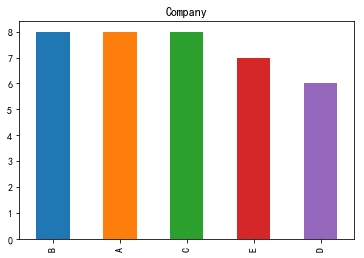

In [7]:
df1['Company'].value_counts().plot(kind='bar',title='Company')

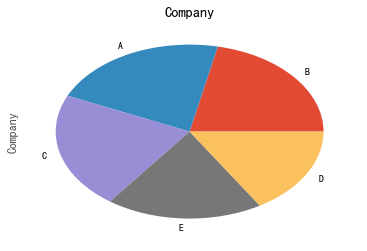

In [10]:
df1['Company'].value_counts().plot(kind='pie',title='Company')

In [222]:
mc1=Mycount(df1)

object 类型数据2列，数字类型数据4列


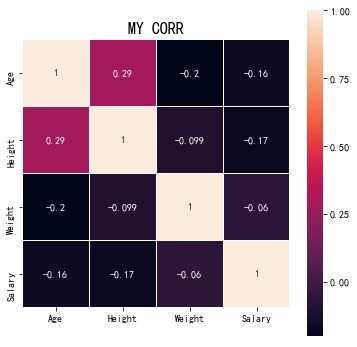

In [220]:
mc1.plt_corr(df1)

In [12]:
mc=Mycount(df1)

object 类型数据2列，数字类型数据4列


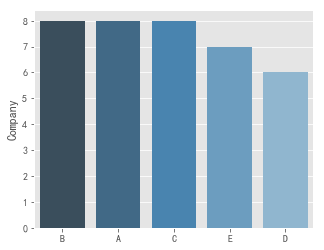

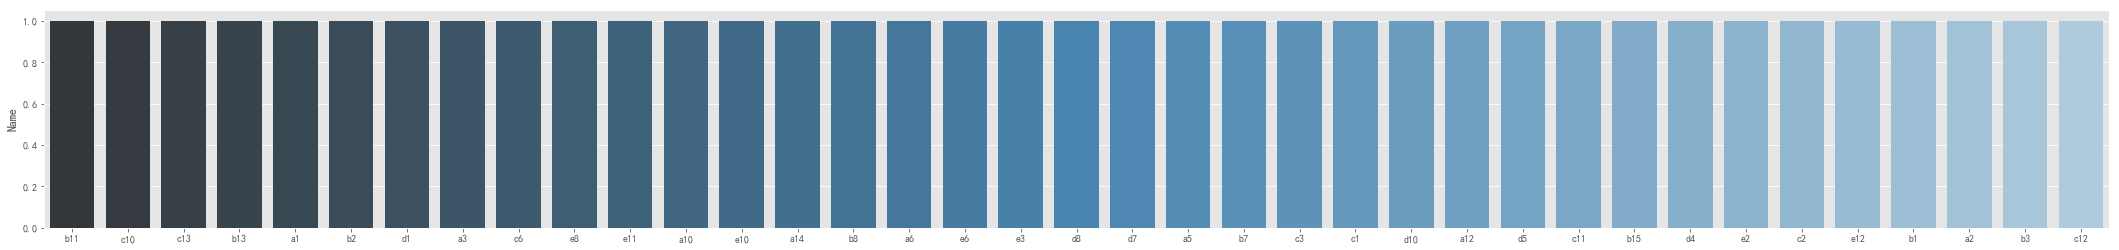

In [14]:
mc.plt_obar(df1)

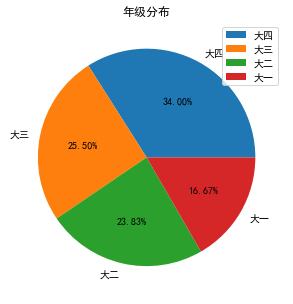

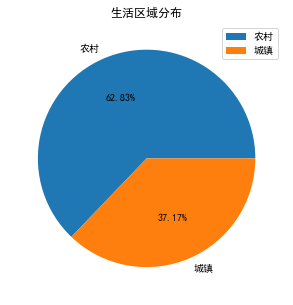

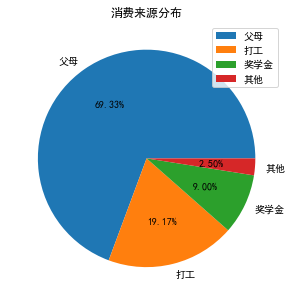

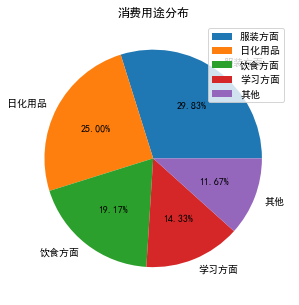

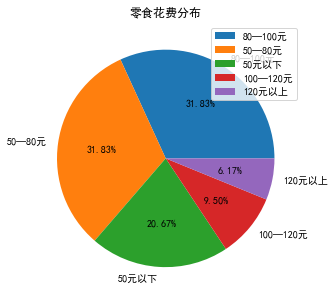

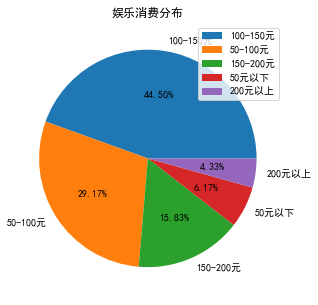

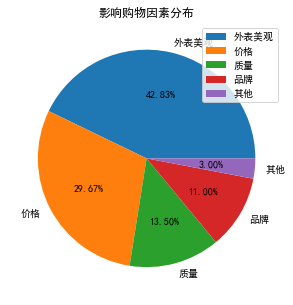

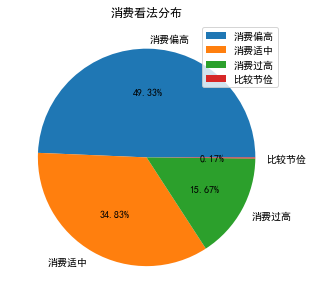

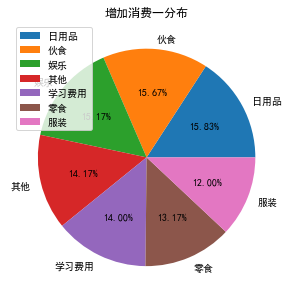

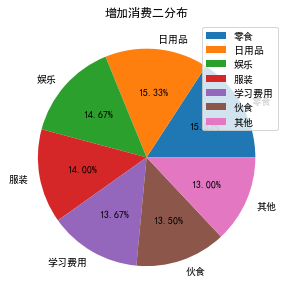

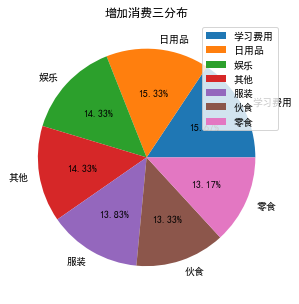

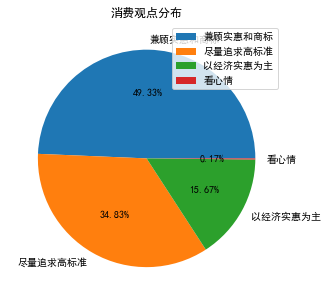

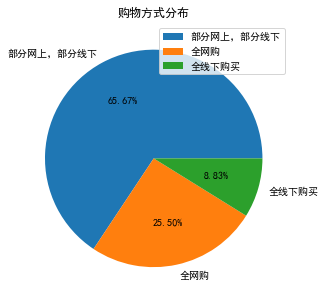

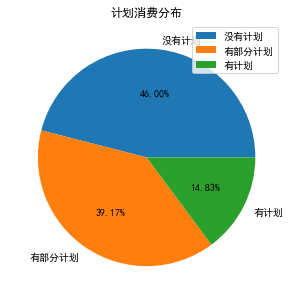

In [187]:
mc.plt_obar(data)

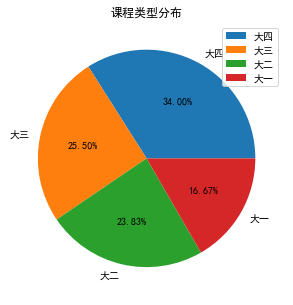

In [179]:

plt.figure(figsize=(5, 5))  # 将画布设定为正方形，则绘制的饼图是正圆
a=data['年级'].value_counts()
b=a.index.tolist()
plt.axes(aspect='equal')
plt.pie(a,labels=b,autopct='%1.2f%%',pctdistance=0.6,labeldistance=1.1)
plt.title('课程类型分布')  # title的使用
plt.legend()
plt.show()  # 可视化呈现


In [178]:
a.index

Index(['大四', '大三', '大二', '大一'], dtype='object')

In [172]:
data['年级'].value_counts().name

'年级'

In [144]:
a=data.groupby('生活区域')['消费用途'].value_counts()

In [149]:
a=pd.crosstab(index=data['生活区域'],columns=data['消费用途'])

In [157]:
a=pd.crosstab(index=data['消费用途'],columns=data['生活区域'])

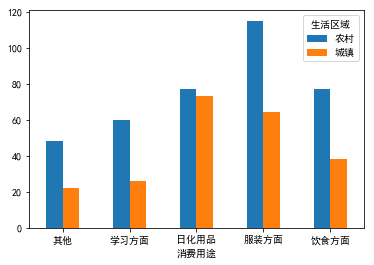

In [162]:
pd.crosstab(index=data['消费用途'],columns=data['生活区域']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [ ]:
g = sns.catplot(x="消费用途", y="total_bill",hue="smoker",data=a)


In [131]:
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise)

pandas.core.frame.DataFrame

In [150]:
g = sns.catplot(x="消费用途", y="生活区域", data=a)

ValueError: Could not interpret input '消费用途'

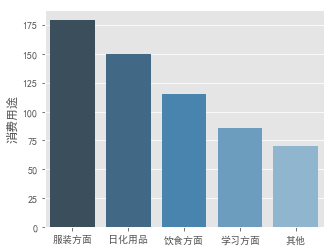

In [17]:
plt.figure(figsize=(5,4))
x=data['消费用途'].value_counts().index
y=data['消费用途'].value_counts()
ax = sns.barplot(x=x,y=y,palette="Blues_d")
plt.show()

In [23]:
mc2=Mycount(data)

object 类型数据14列，数字类型数据2列


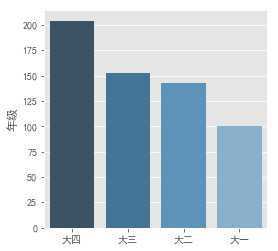

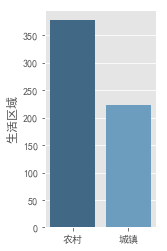

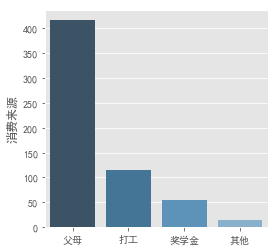

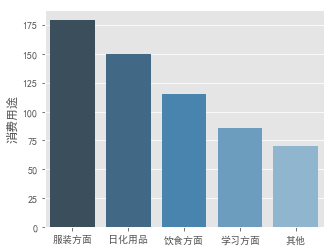

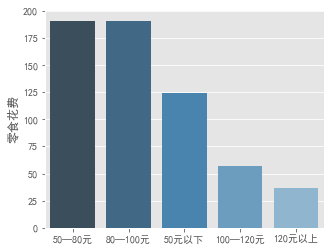

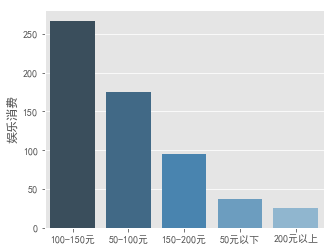

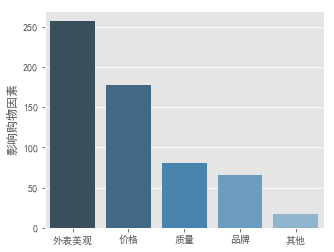

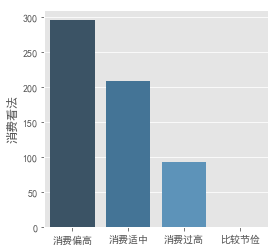

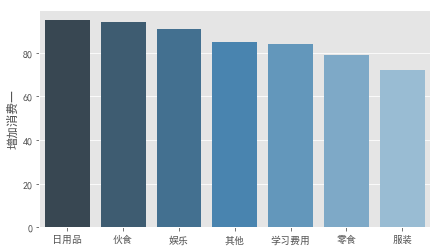

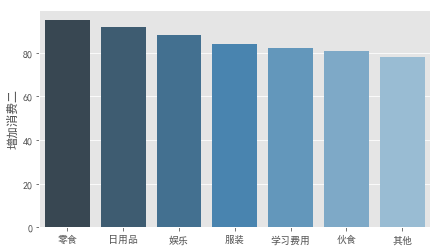

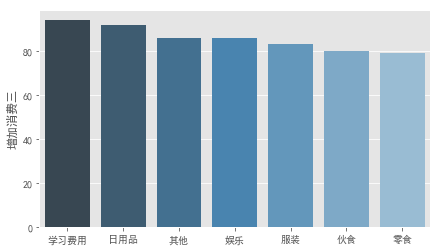

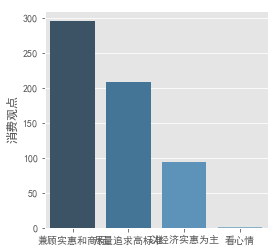

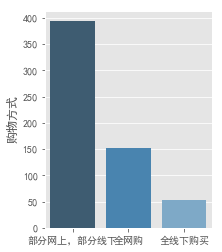

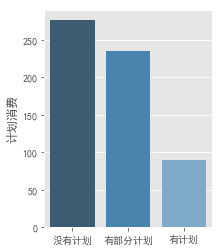

In [29]:
mc2.plt_obar(data)

In [96]:
data['消费用途'].value_counts().index

Index(['服装方面', '日化用品', '饮食方面', '学习方面', '其他'], dtype='object')

In [15]:
file_path='E:/data analy/客户数据/夏-交付文件/'
raw_data=pd.read_excel(file_path+'大数据.xlsx')
raw_data.shape

(600, 16)

In [16]:
mapping_dict={'年级':{1:'大一',
                      2:'大二',
                      3:'大三',
                      4:'大四'},
              
              '生活区域':{
                  1:'城镇',
                  2:'农村'},
              
              '消费来源':{
                  1:'父母',
                  2:'打工',
                  3:'奖学金',
                  4:'其他'},
              
              '消费用途':{
                  1:'饮食方面',
                  2:'学习方面',
                  3:'服装方面',
              4:'日化用品',
              5:'其他'},
              
              '零食花费':{
                  1:'50元以下',
                  2:'50—80元',
                  3:'80—100元',
                  4:'100—120元',
                  5:'120元以上'
              },
              
              '娱乐消费':{
                  1:'50元以下',
                  2:'50-100元',
                  3:'100-150元',
                  4:'150-200元',
                  5:'200元以上',
              },
              
              '影响购物因素':{
                  1:'质量',
                  2:'外表美观',
                  3:'价格',
                  4:'品牌',
                  5:'其他'
              },
              
              '消费看法':{
                  1:'消费过高',
                  2:'消费偏高',
                  3:'消费适中',
                  4:'比较节俭'
              },
              
              '增加消费一':{
                  1:'伙食',
                  2:'服装',
                  3:'学习费用',
                  4:'零食',
                  5:'娱乐',
                  6:'日用品',
                  7:'其他'
              },
              
               '增加消费二':{
                  1:'伙食',
                  2:'服装',
                  3:'学习费用',
                  4:'零食',
                  5:'娱乐',
                  6:'日用品',
                  7:'其他'
              },
              
               '增加消费三':{
                  1:'伙食',
                  2:'服装',
                  3:'学习费用',
                  4:'零食',
                  5:'娱乐',
                  6:'日用品',
                  7:'其他'
              },
              
              '消费观点':{
                  1:'以经济实惠为主',
                  2:'兼顾实惠和商标',
                  3:'尽量追求高标准',
                  4:'看心情'
              },
              
              '购物方式':{
                  1:'全网购',
                  2:'全线下购买',
                  3:'部分网上，部分线下'
                  
              },
              
              '计划消费':{
                  1:'有计划',
                  2:'没有计划',
                  3:'有部分计划'
              }  
}

data=raw_data.replace(mapping_dict)
data.head()

,年级,生活区域,月消费,消费来源,消费用途,零食花费,娱乐消费,影响购物因素,消费看法,增加消费一,增加消费二,增加消费三,合理月消费,消费观点,购物方式,计划消费
0,大一,农村,600,父母,饮食方面,50—80元,100-150元,外表美观,消费适中,日用品,日用品,零食,800,尽量追求高标准,部分网上，部分线下,没有计划
1,大二,农村,700,打工,学习方面,50—80元,150-200元,外表美观,消费偏高,服装,伙食,日用品,800,兼顾实惠和商标,部分网上，部分线下,有部分计划
2,大三,农村,700,父母,服装方面,80—100元,100-150元,外表美观,消费适中,娱乐,服装,伙食,800,尽量追求高标准,部分网上，部分线下,没有计划
3,大四,城镇,900,父母,服装方面,80—100元,200元以上,价格,消费偏高,娱乐,零食,其他,900,兼顾实惠和商标,部分网上，部分线下,没有计划
4,大一,城镇,900,父母,服装方面,50—80元,100-150元,价格,消费过高,日用品,伙食,娱乐,900,以经济实惠为主,全线下购买,没有计划


In [22]:
import numpy as np
import pandas as pd

In [164]:
mc=Mycount()

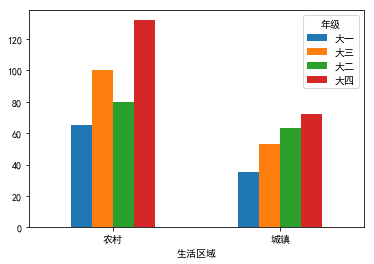

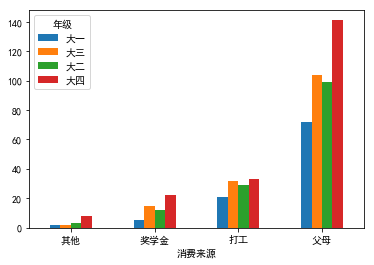

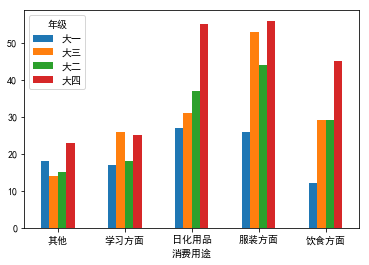

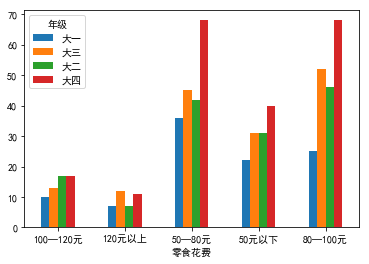

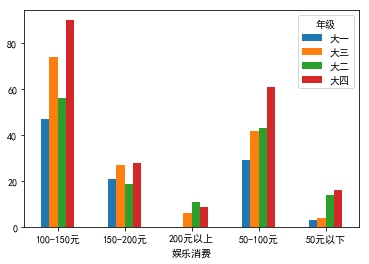

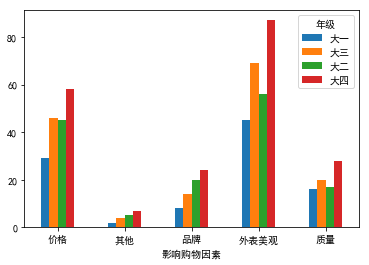

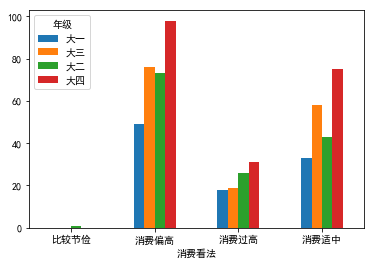

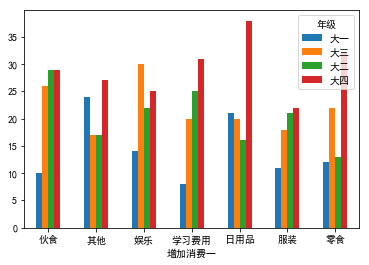

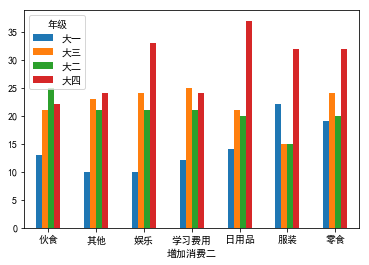

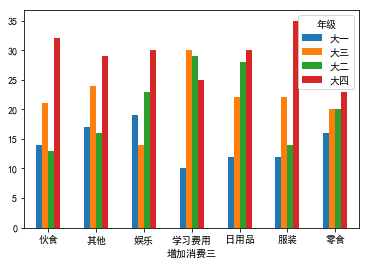

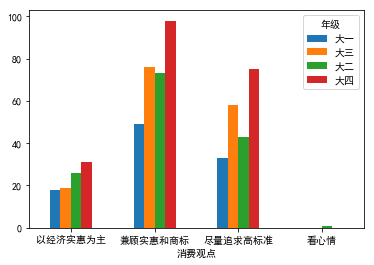

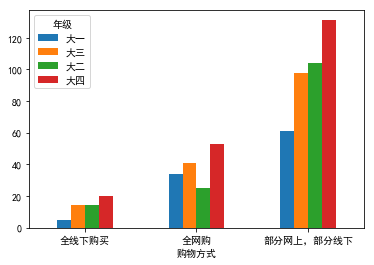

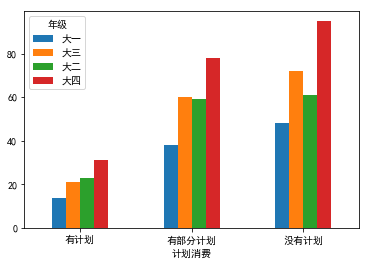

In [166]:
mc.plt_crossbar(data,'')

In [39]:
mc.nname(data)

['月消费', '合理月消费']

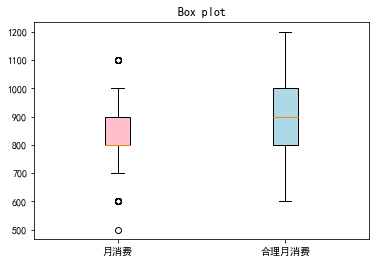

In [52]:

fig = plt.figure(figsize=(6, 4))
bplot = plt.boxplot(data[['月消费', '合理月消费']].values,
                    notch=False,
                    vert=True,  # vertical box aligmnent
                    patch_artist=True)  # fill with color

colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors[:2]):
    patch.set_facecolor(color)
plt.xticks([y + 1 for y in range(2)], mc.nname(data))
plt.title('Box plot')
plt.show()

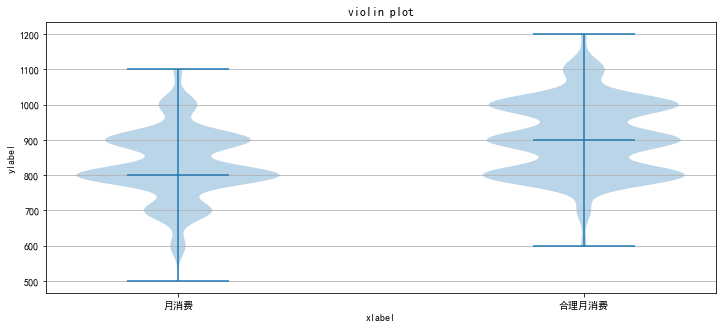

In [56]:
fig, axes = plt.subplots(figsize=(12, 5))

all_data = data[['月消费', '合理月消费']].values
axes.violinplot(all_data,
                   showmeans=False,
                   showmedians=True
                   )
axes.set_title('violin plot')

# adding horizontal grid lines

axes.yaxis.grid(True)
axes.set_xticks([y + 1 for y in range(2)], )
axes.set_xlabel('xlabel')
axes.set_ylabel('ylabel')

plt.setp(axes, xticks=[y + 1 for y in range(2)],
         xticklabels=['月消费', '合理月消费'],
         )

plt.show()

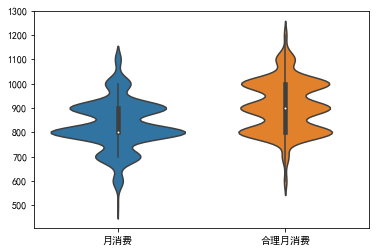

In [60]:
import seaborn as sns
sns.violinplot(data = data[mc.nname(data)])
plt.show()

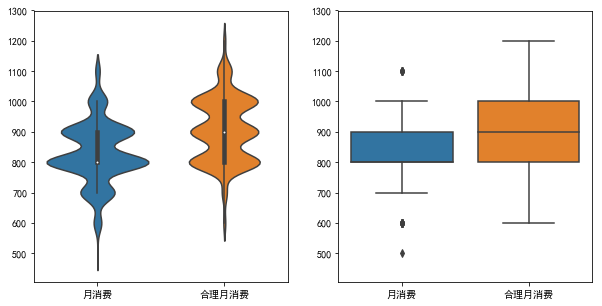

In [66]:
plt.figure(figsize = [10, 5])
# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data=data[mc.nname(data)])

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=data[mc.nname(data)])
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.show()

In [65]:
data[mc.nname(data)]

,月消费,合理月消费
0,600,800
1,700,800
2,700,800
3,900,900
4,900,900
5,1000,1000
6,1000,1000
7,900,900
8,800,800
9,800,800


In [9]:
col=list('abcde')
data=pd.DataFrame(a,columns=col)
data

,a,b,c,d,e
0,0.100211,0.197280,0.838310,0.735623,0.259739
1,0.913190,0.075556,0.832559,0.100182,0.303494
2,0.800550,0.186928,0.832931,0.498574,0.189410
3,0.224976,0.093651,0.032629,0.956267,0.568268


In [14]:
data.query('a>0.5')

,a,b,c,d,e
1,0.91319,0.075556,0.832559,0.100182,0.303494
2,0.80055,0.186928,0.832931,0.498574,0.189410


In [10]:
data.max(axis=1)

0    0.838310
1    0.913190
2    0.832931
3    0.956267
dtype: float64

In [12]:
data.mean(axis=1)

0    0.426232
1    0.444996
2    0.501679
3    0.375158
dtype: float64

In [11]:
data.max(axis=0)

a    0.913190
b    0.197280
c    0.838310
d    0.956267
e    0.568268
dtype: float64